In [1]:
%pylab inline
import matplotlib.gridspec as gridspec
from astropy.table import Table,Column
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import os

from PIL import Image
import urllib, cStringIO
import random

#function for getting galaxy images
def get_image_from_url(url):

    file = cStringIO.StringIO(urllib.urlopen(url).read())
    img = Image.open(file)
    return img


mpl.rcParams['text.usetex']=True
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 


Populating the interactive namespace from numpy and matplotlib


In [ ]:
#1: match GZH and UV
#70,198 galaxies matched between COSMOS and UV
data=Table.read('../data/cosmos_uv_matched_catalog.fits')

In [205]:
p_artifact = 't01_smooth_or_features_a03_star_or_artifact_weighted_fraction'
not_an_artifact = (data[p_artifact]<.7)
z_lim = (data['Z_BEST']<1) & (data['Z_BEST']>0)
mu_cut = (data['MU_HI']<22)
pdata=data[not_an_artifact & z_lim & mu_cut]

In [219]:
colorhist,xedge,yedge = np.histogram2d(pdata['MR']-pdata['MJ'],pdata['MNUV']-pdata['MR'],bins=(10,10),range=((-.5,2),(0,7)))
extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]]


N_max = 10
colorhist = np.ma.array(colorhist,mask=(colorhist<N_max))

<matplotlib.colorbar.Colorbar instance at 0x7f5799536170>

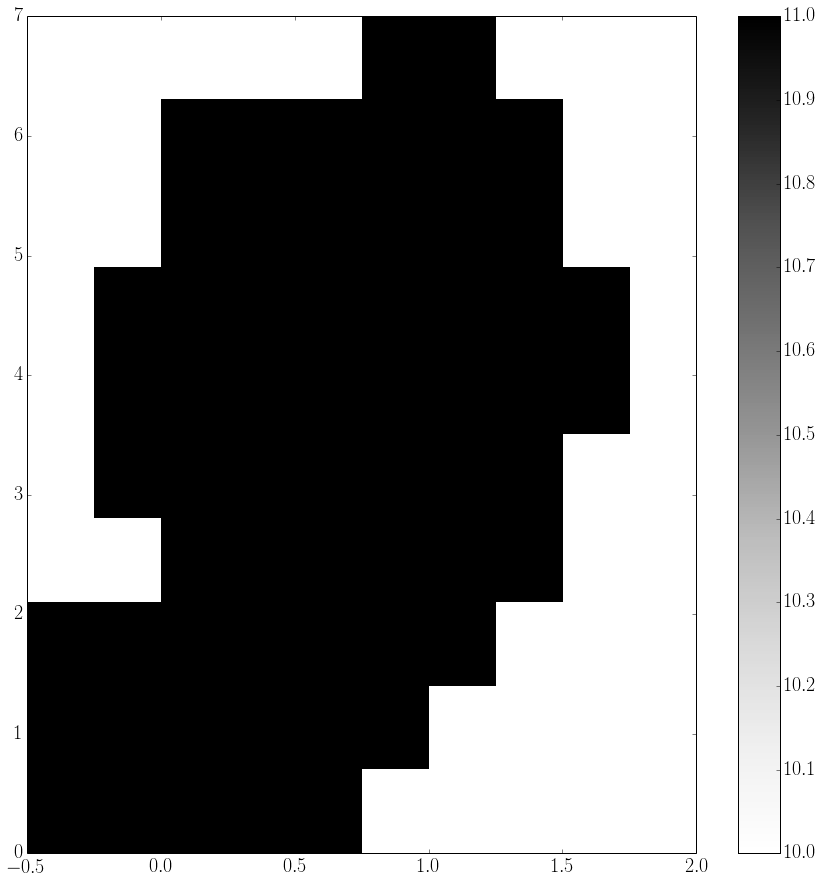

In [220]:
f=plt.figure(figsize=(15,15))
plt.imshow(colorhist.T,origin='lower',extent=extent,interpolation='nearest',cmap=cm.Greys,aspect='auto',vmax=N_max+1)
plt.colorbar()


In [217]:
Nx =len(xedge)
Ny = len(yedge)
int_map=np.linspace(0,Nx-1,Nx)
int_map = int_map[::-1]
int_map = [int(i) for i in int_map]

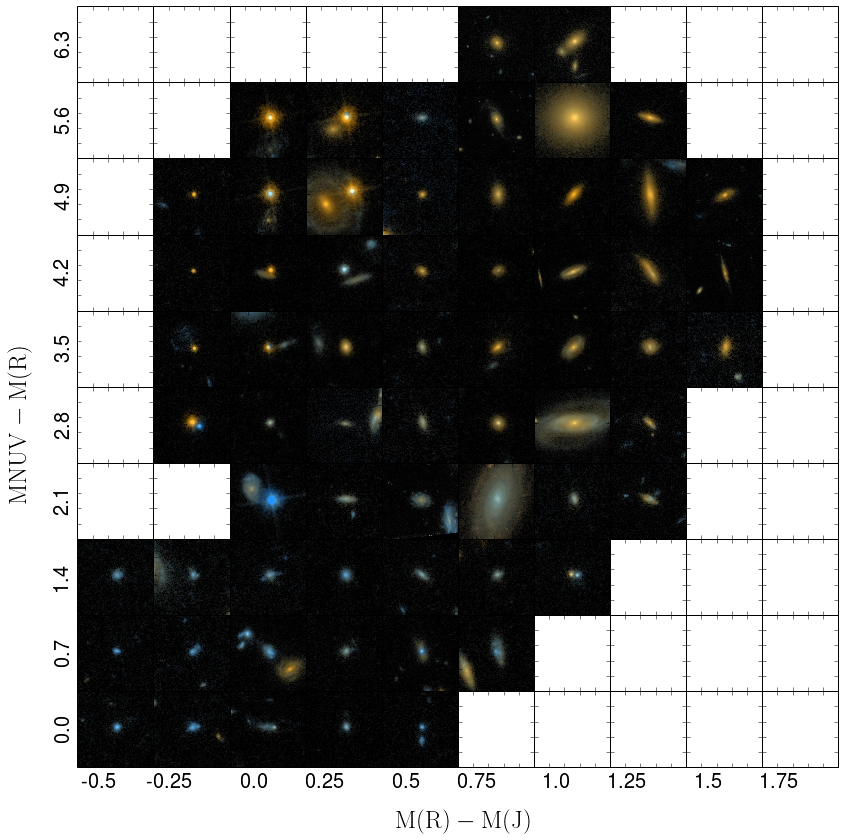

In [222]:
f=plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(Nx,Ny)
gs.update(wspace=0,hspace=0)
for i in range(0,Nx-1):
    for j in range(0,Ny-1):
        ax = plt.subplot(gs[int_map[i],j])
        if colorhist.T.mask[i,j]==False: #enough galaxies in bin
            ### annotations to check the bin edges are correct
            min_x = xedge[j]
            max_x = xedge[j+1]
            min_y = yedge[i]
            max_y = yedge[i+1]

            #ax.annotate('x=%s,x=%s'%(min_x,max_x),fontsize=12,xy=(0.02,.97),
            #xycoords='axes fraction',verticalalignment='top')
            #ax.annotate('y=%s,y=%s'%(min_y,max_y),fontsize=12,xy=(0.02,.02),
            #xycoords='axes fraction')
            gals_in_bin = (data['MNUV']-data['MR']>min_y) & (data['MNUV']-data['MR']<max_y) & (data['MR']-data['MJ']>min_x) & (data['MR']-data['MJ']<max_x)
            #galaxy in bin:
            gal = data[gals_in_bin & not_an_artifact & z_lim & mu_cut][0]
            plt.imshow(get_image_from_url(gal['location']))
            #plt.plot(testx,testx)
        plt.tick_params(labelbottom='off',labelleft='off')
            
        if i==0:
            plt.xlabel('%s   '%xedge[j],fontsize=20,horizontalalignment='right')
        if j==0:
            plt.ylabel('%s'%yedge[i],fontsize=20,verticalalignment='bottom')
f.text(.42,.07,'$\mathrm{M(R)-M(J)}$',fontsize=25)
f.text(.06,.5,'$\mathrm{MNUV-M(R)}$',fontsize=25,rotation=90)

In [140]:
gals_in_bin = (data['MNUV']-data['MR']>min_y) & (data['MNUV']-data['MR']<max_y) & (data['MR']-data['MJ']>min_x) & (data['MR']-data['MJ']<max_x)


In [155]:
colorhist.T.mask[i,j]

False

In [152]:
colorhist.T

masked_array(data =
 [[35.0 95.0 250.0 242.0 142.0 44.0 16.0 -- -- --]
 [224.0 1006.0 3507.0 4398.0 1351.0 261.0 70.0 -- -- --]
 [111.0 594.0 3646.0 10358.0 6645.0 1444.0 214.0 49.0 -- --]
 [14.0 43.0 336.0 1888.0 4460.0 4197.0 1056.0 144.0 16.0 --]
 [-- 19.0 89.0 297.0 1204.0 2806.0 2194.0 527.0 46.0 --]
 [-- 16.0 41.0 206.0 814.0 1790.0 1696.0 715.0 161.0 --]
 [-- 16.0 51.0 145.0 830.0 2254.0 1070.0 501.0 158.0 15.0]
 [-- 12.0 121.0 161.0 438.0 1985.0 1026.0 102.0 38.0 --]
 [-- -- 17.0 56.0 46.0 396.0 711.0 31.0 -- --]
 [-- -- -- 10.0 12.0 74.0 83.0 14.0 -- --]],
             mask =
 [[False False False False False False False  True  True  True]
 [False False False False False False False  True  True  True]
 [False False False False False False False False  True  True]
 [False False False False False False False False False  True]
 [ True False False False False False False False False  True]
 [ True False False False False False False False False  True]
 [ True False False False Fal

In [150]:
            ### annotations to check the bin edges are correct
            '''ax.annotate('x=%s,x=%s'%(xedge[j],xedge[j+1]),fontsize=12,xy=(0.02,.97),
            xycoords='axes fraction',verticalalignment='top')
            ax.annotate('y=%s,y=%s'%(yedge[::-1][i+1],yedge[::-1][i]),fontsize=12,xy=(0.02,.02),
            xycoords='axes fraction')'''

-0.5

In [187]:
colorhist

array([[  2.60000000e+01,   1.70000000e+02,   9.10000000e+01,
          9.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  6.60000000e+01,   8.00000000e+02,   5.44000000e+02,
          3.70000000e+01,   1.60000000e+01,   1.50000000e+01,
          1.50000000e+01,   1.00000000e+01,   3.00000000e+00,
          0.00000000e+00],
       [  1.44000000e+02,   2.76700000e+03,   3.29000000e+03,
          2.60000000e+02,   5.30000000e+01,   2.60000000e+01,
          3.60000000e+01,   5.40000000e+01,   1.30000000e+01,
          1.00000000e+00],
       [  8.50000000e+01,   3.17700000e+03,   9.23100000e+03,
          1.69800000e+03,   2.36000000e+02,   1.44000000e+02,
          9.70000000e+01,   6.40000000e+01,   1.60000000e+01,
          3.00000000e+00],
       [  3.20000000e+01,   5.83000000e+02,   5.04300000e+03,
          3.95900000e+03,   1.04200000e+03,   6.37000000e+02,
          6.54000000e+02

In [188]:
colorhist=np.ma.array(mask=colorhist<10)

In [189]:
colorhist

masked_array(data =
 [[False False False  True  True  True  True  True  True  True]
 [False False False False False False False False  True  True]
 [False False False False False False False False False  True]
 [False False False False False False False False False  True]
 [False False False False False False False False False  True]
 [ True False False False False False False False False False]
 [ True False False False False False False False False False]
 [ True  True False False False False False False False  True]
 [ True  True  True  True False False False False  True  True]
 [ True  True  True  True  True  True False  True  True  True]],
             mask =
 False,
       fill_value = True)